# Traveling Salesman Problem

> Tuckfield, B. (2021). Dive Into Algorithms: A Pythonic Adventure for the Intrepid Beginner. No Starch Press.

16.808756356994223


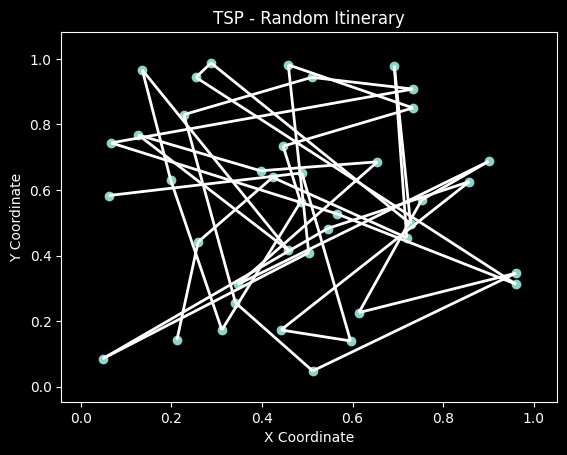

In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mc

random_seed = 1729
np.random.seed(random_seed)
N = 40
x = np.random.rand(N)
y = np.random.rand(N)

cities = list(zip(x, y))
itinerary = list(range(N))

def genlines(cities, itinerary):
    return [[cities[itinerary[j]], cities[itinerary[j + 1]]] for j, _ in enumerate(itinerary[:-1])]

def howfar(lines):
    distance = 0
    for line in lines:
        x1, y1 = line[0]
        x2, y2 = line[1]
        distance += math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

totaldistance = howfar(genlines(cities, itinerary))
print(totaldistance)

def plotitinerary(cities, itin, plottitle):
    lines = genlines(cities, itin)
    lc = mc.LineCollection(lines, linewidths=2)
    fig, ax = plt.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    plt.scatter(x, y)
    plt.title(plottitle)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

plotitinerary(cities, itinerary, 'TSP - Random Itinerary')


![Figure2](../../../../img/8.2-tsp.png)

# Minimum Spanning Tree

In [28]:
import heapq
from multiprocessing import parent_process
from typing import Literal, Any

class Graph:
    def __init__(self, num_vertices) -> None:
        self.num_vertices: Any = num_vertices
        self.adjacency_list: list[list] = [[] for _ in range(num_vertices)]

    def add_edge(self, u, v, weight) -> None:
        self.adjacency_list[u].append((v, weight))
        self.adjacency_list[v].append((u, weight))

    def prim_mst(self):
        mst: list = []
        visited: list[bool] = [False] * self.num_vertices
        start_vertex = 0  # Start with vertex 0 as the root

        # Priority queue to store edges with their weights
        pq: list[tuple[Literal[0], Literal[0]]] = [(0, start_vertex)]
        heapq.heapify(pq)

        while pq:
            weight, current_vertex = heapq.heappop(pq)
            if visited[current_vertex]:
                continue

            visited[current_vertex] = True
            if current_vertex != start_vertex:
                mst.append((current_vertex, parent_process))
            
            for neighbor, edge_weight in self.adjacency_list[current_vertex]:
                if not visited[neighbor]:
                    heapq.heappush(pq, (edge_weight, neighbor))
        
        return mst


## Graph 1

In [29]:
# Create a graph with 5 vertices
g = Graph(5)

# Add edges to the graph
g.add_edge(0, 1, 2)
g.add_edge(0, 3, 6)
g.add_edge(1, 2, 3)
g.add_edge(1, 3, 8)
g.add_edge(1, 4, 5)
g.add_edge(2, 4, 7)
g.add_edge(3, 4, 9)

# Find the MST using Prim's algorithm
mst = g.prim_mst()

# Print the edges in the MST
for edge in mst:
    u, v = edge
    print(f"{u} - {v}")


1 - <function parent_process at 0x0000020AFFA6A7A0>
2 - <function parent_process at 0x0000020AFFA6A7A0>
4 - <function parent_process at 0x0000020AFFA6A7A0>
3 - <function parent_process at 0x0000020AFFA6A7A0>


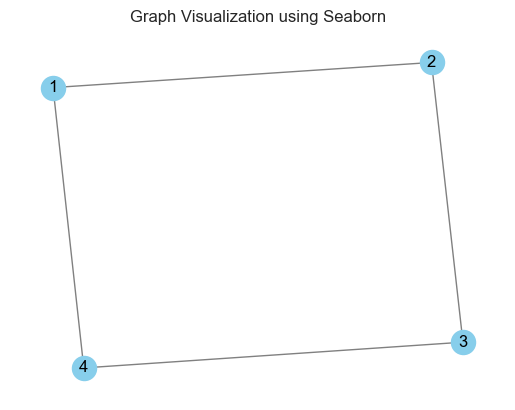

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Create a graph using NetworkX
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 1)

# Draw the graph using Seaborn
sns.set_style("whitegrid")
pos = nx.spring_layout(G)  # Layout algorithm to position the nodes
nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', edge_color='gray')

# Customize the plot aesthetics using Seaborn
plt.title("Graph Visualization using Seaborn")
plt.axis('off')
sns.despine()

# Show the plot
plt.show()


## Graph 2

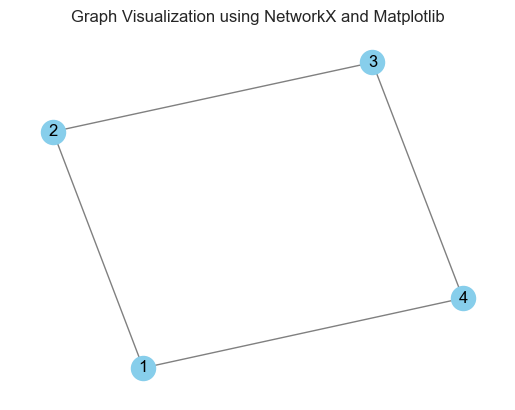

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph using NetworkX
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 1)

# Draw the graph using matplotlib
pos = nx.spring_layout(G)  # Layout algorithm to position the nodes
nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', edge_color='gray')

# Customize the plot aesthetics using matplotlib
plt.title("Graph Visualization using NetworkX and Matplotlib")
plt.axis('off')

# Show the plot
plt.show()
